/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 78 pixels
  return func(*args, **kwargs)


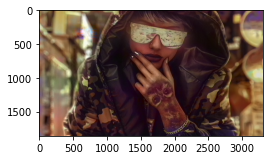

In [1]:
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch
import colorECV

from ImageData import ImageData
from Utils import postprocess_tens_new

import matplotlib.pyplot as plt






# root = 'data/test_black/'

img = 'data/test_black/black_and_white_image.jpg'
transform = transforms.Compose(
            [
                transforms.Resize((400,400)),
                transforms.ToTensor()
            ]
        )
dataloader = DataLoader(
    ImageData(img, transform),
)




#----------------------------
# Initialization and Prediction
#----------------------------

# shape = (400, 400)
modelnum = 60
# Initialize generator and discriminator
generator = colorECV.color_ecv(in_channels = 3)
generator.load_state_dict(torch.load(f"models/generator_{modelnum-1}.pth", map_location=torch.device('cpu')))    
# dname = ['05','07','12','15','20','22','25','39','50','89']


Tensor = torch.Tensor



for i, imgs in enumerate(dataloader):

    # imgs_black : Light Channel of the Image in Model Shape
    # imgs_black_orig : Light Channel of the Image in Original Image Shape
    # imgs_color : Colourfull Image Provided 
    # gen_ab : A and B channel generated by the generator
    # gen_color : Colourfull Image generated by the Generator after postprocessing
    
    # Configure model input
    imgs_black = Variable(imgs["black"].type(Tensor))
    imgs_black_orig = Variable(imgs["orig"].type(Tensor))
    # imgs_color = Variable(imgs["color"].type(Tensor))

    # Generate a high resolution image from low resolution input
    gen_ab = generator(imgs_black)
    gen_color = postprocess_tens_new(imgs_black_orig, gen_ab)
    gen_color = make_grid(torch.tensor(gen_color), nrow=1, normalize=True)

    # save_image(gen_color, f"data/output/coloured_img_{modelnum}.jpg", normalize=False)
    transformp = transforms.ToPILImage()
    img = transformp(gen_color)
    # img = gen_color.numpy()
    plt.figure(figsize=(4,16))
    plt.imshow(img)
    plt.show()


In [7]:
type(img)

PIL.Image.Image

In [ ]:
transform_pipeline = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Transform the tensor image
pil_img = transform_pipeline(tensor_img)
pil_img = pil_img.numpy()
@app.route('/ColorImage')
def ColorImage():
    img_bytes = pil_img.tobytes()
    return Response(img_bytes, mimetype='image/jpeg')